In [259]:
# CPE 695-A Final Project Team 11

# Group members:
# Chinmay Patankar
# Mandar Parab
# Kush Hiteshkumar Jani


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

# Reading csv and converted values in status column : acquired = 1 else = 0
df = pd.read_csv('data.csv', converters={'status': lambda x: int(x == 'acquired')})
df.head(n=5)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,0


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [261]:
# statistical summary of numerical values
describeNum = df.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,923.000000,572.297941,333.585431,1.000000,283.500000,577.000000,866.500000,1153.000000
latitude,923.000000,38.517442,3.741497,25.752358,37.388869,37.779281,40.730646,59.335232
longitude,923.000000,-103.539212,22.394167,-122.756956,-122.198732,-118.374037,-77.214731,18.057121
labels,923.000000,0.646804,0.478222,0.000000,0.000000,1.000000,1.000000,1.000000
age_first_funding_year,923.000000,2.235630,2.510449,-9.046600,0.576700,1.446600,3.575350,21.895900
age_last_funding_year,923.000000,3.931456,2.967910,-9.046600,1.669850,3.528800,5.560250,21.895900
age_first_milestone_year,771.000000,3.055353,2.977057,-14.169900,1.000000,2.520500,4.686300,24.684900
age_last_milestone_year,771.000000,4.754423,3.212107,-7.005500,2.411000,4.476700,6.753400,24.684900
relationships,923.000000,7.710726,7.265776,0.000000,3.000000,5.000000,10.000000,63.000000
funding_rounds,923.000000,2.310943,1.390922,1.000000,1.000000,2.000000,3.000000,10.000000


In [262]:
# statistical summary of object values
describeObj = df.describe(include=["O"])
describeObj.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,unique,top,freq
state_code,923,35,CA,488
zip_code,923,382,94107,30
id,923,922,c:28482,2
city,923,221,San Francisco,128
Unnamed: 6,430,252,San Francisco CA 94105,12
name,923,922,Redwood Systems,2
founded_at,923,217,1/1/2003,55
closed_at,335,202,6/1/2013,25
first_funding_at,923,585,1/1/2008,18
last_funding_at,923,680,1/1/2008,11


In [263]:
# how many null values are present
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values
Unnamed: 6,493,53.412784
closed_at,588,63.705309
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039
state_code.1,1,0.108342


In [264]:
# Checking missing values column 
df[["Unnamed: 6", "closed_at", "age_first_milestone_year", "age_last_milestone_year", "state_code.1", "status"]].head(4)

,Unnamed: 6,closed_at,age_first_milestone_year,age_last_milestone_year,state_code.1,status
0,NaN,NaN,4.6685,6.7041,CA,1
1,NaN,NaN,7.0055,7.0055,CA,1
2,San Diego CA 92121,NaN,1.4575,2.2055,CA,1
3,Cupertino CA 95014,NaN,6.0027,6.0027,CA,1


In [265]:
# unamed: 6 is a combination of city, zip_code and state_code so removed the contents of the column and replaced it by combination of  
# city, zip_code and state_code
df['Unnamed: 6'] = df.apply(lambda row: (row.city) + " " + (row.state_code) + " " +(row.zip_code)  , axis = 1)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,0


In [266]:
# closed_at attribute indicates the date the startup closed.
df[['founded_at','closed_at','status']].head(5)

,founded_at,closed_at,status
0,1/1/2007,NaN,1
1,1/1/2000,NaN,1
2,3/18/2009,NaN,1
3,1/1/2002,NaN,1
4,8/1/2010,10/1/2012,0


In [267]:
# As shown above NaN value represents the startup is acquired so we fill the NaN values with 31/12/2013
df['closed_at'] = df['closed_at'].fillna(value="31/12/2013")

df[['age_first_milestone_year','age_last_milestone_year','milestones']].head()


,age_first_milestone_year,age_last_milestone_year,milestones
0,4.6685,6.7041,3
1,7.0055,7.0055,1
2,1.4575,2.2055,2
3,6.0027,6.0027,1
4,0.0384,0.0384,1


In [268]:
# replaced NA/null values with 0 as the below 2 columns reperesent number of milestones
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(value=0)
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(value=0)

# dropping state_code.1 has its a duplicate of state_code
df.drop(["state_code.1"], axis=1, inplace=True)

# how many null values are present
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values


(36.5, -0.5)

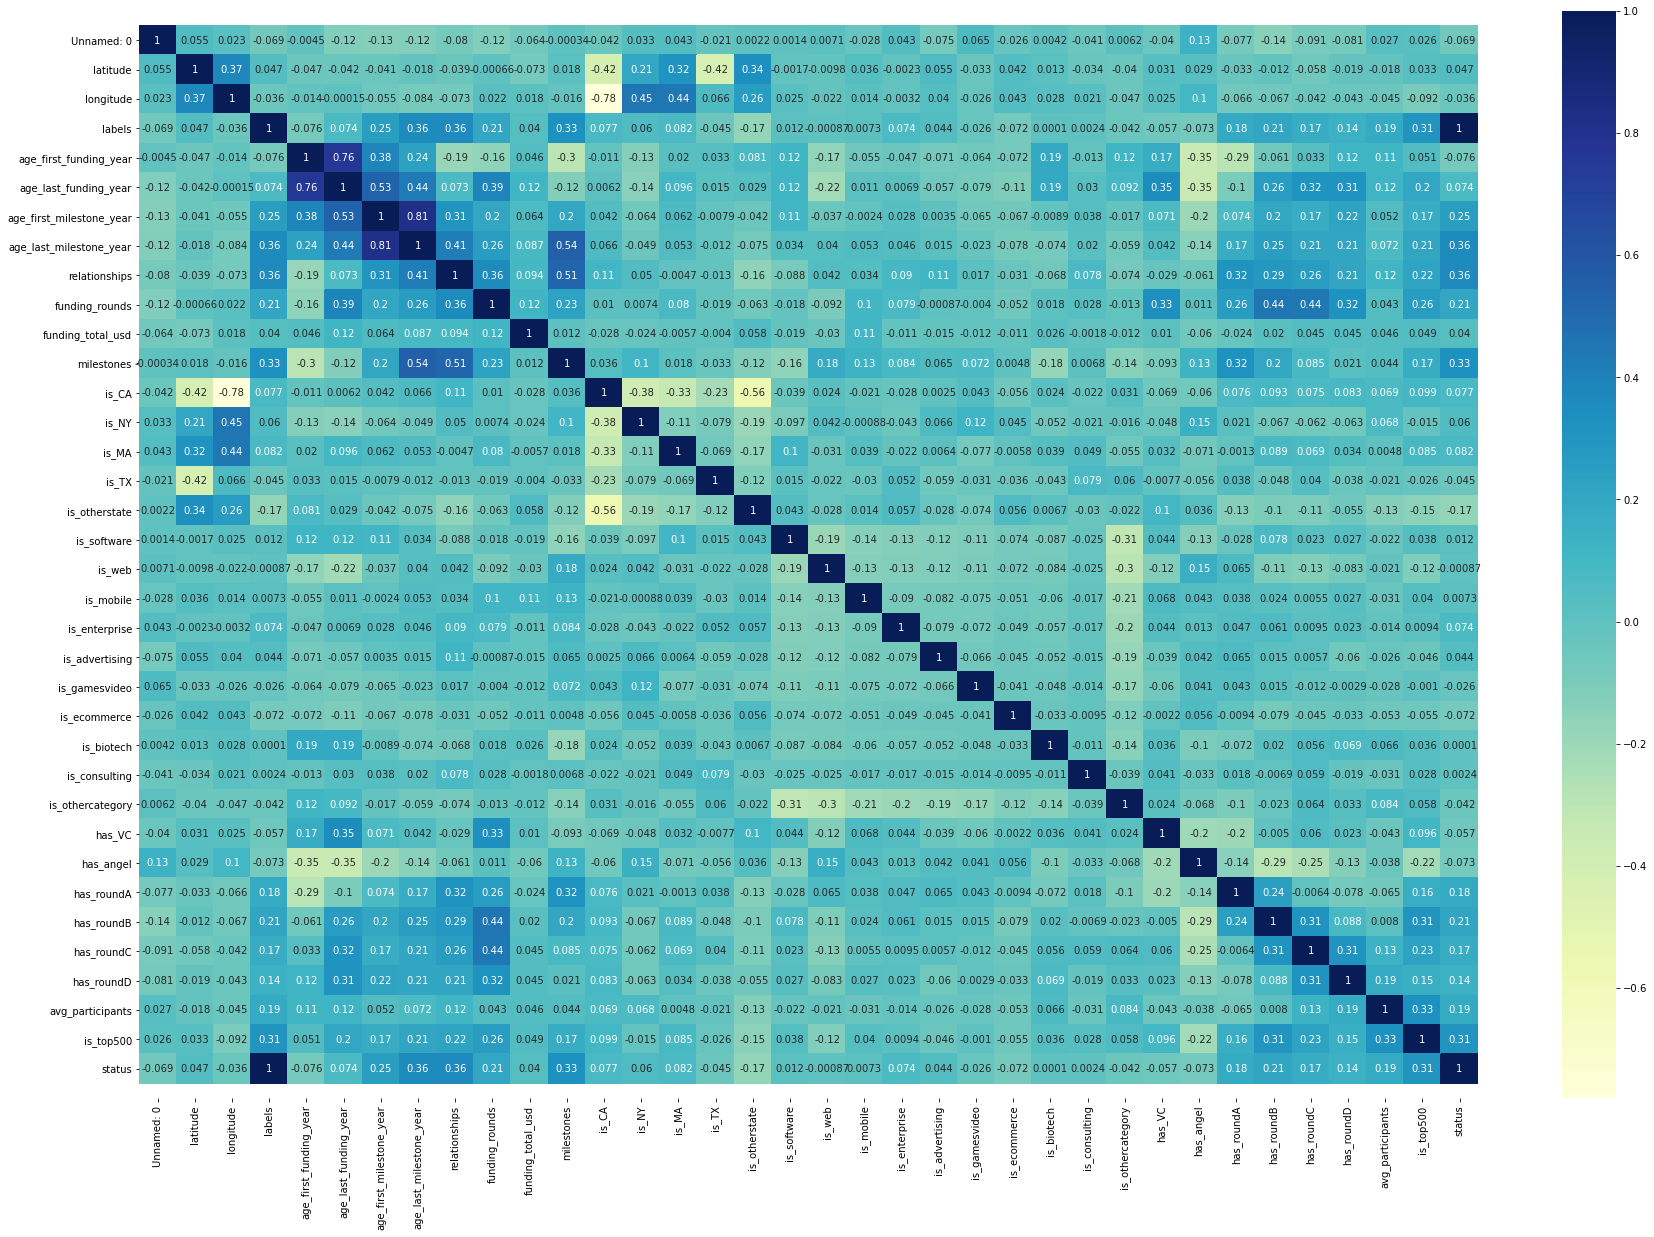

In [269]:
#   heatmap to show relation between variables
plt.figure(figsize=(30,20))
ax = sns.heatmap(data = df.corr(),cmap='YlGnBu',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

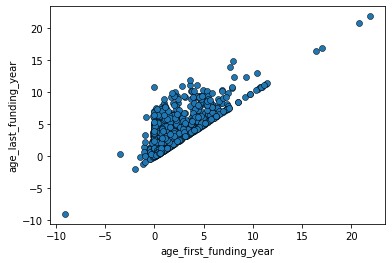

In [270]:
# scatter plot to show relation between age_first_funding_year and age_last_funding_year
fig, ax = plt.subplots()
plot = plt.scatter(x=df['age_first_funding_year'], y=df['age_last_funding_year'], edgecolors="#000000", linewidths=0.5)
plot = ax.set(xlabel="age_first_funding_year", ylabel="age_last_funding_year")

1    597
0    326
Name: status, dtype: int64


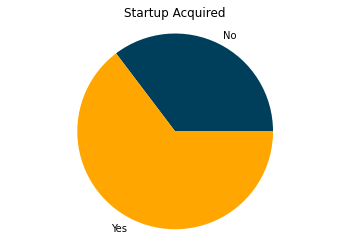

In [271]:
value_counts = df["status"].value_counts()
print(value_counts)
fig, ax = plt.subplots()
plot = ax.pie(x=[value_counts[0], value_counts[1]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
plot = ax.axis('equal')
plot = ax.set_title('Startup Acquired')

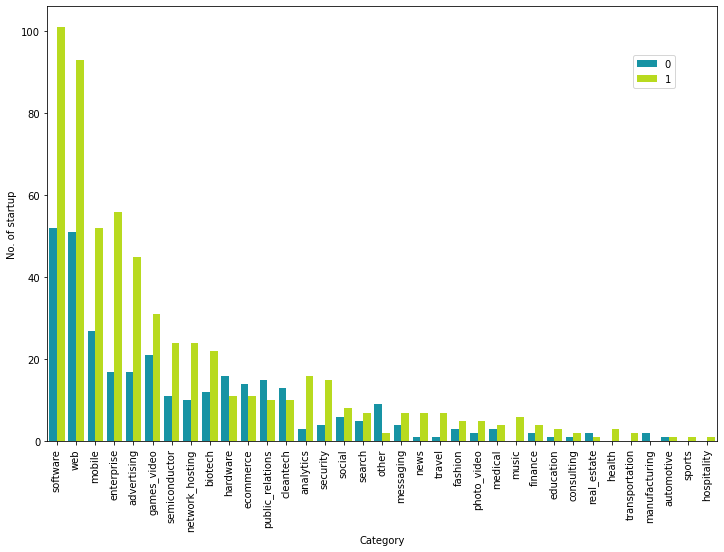

In [272]:
# which catgory has the largest number of startup?
fig, ax = plt.subplots(figsize=(12,8))

plot = sns.countplot(x="category_code", hue="status", data=df, palette="nipy_spectral",
              order=df.category_code.value_counts().index)

plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plot = ax.set(xlabel="Category", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [273]:
# Calculating the success rate of startup of an industry
data1 = df[df['status']==1].groupby(['category_code']).agg({'status':'count'}).reset_index()
data1.columns=['category_code','total_success']

data2 = df[df['status']==0].groupby(['category_code']).agg({'status':'count'}).reset_index()
data2.columns=['category_code','total_closed']

data3=df.groupby(['category_code']).agg({'status':'count'}).reset_index()
data3.columns=['category_code','total_startup']

data1= data1.merge(data2, on='category_code')
data1= data1.merge(data3, on='category_code')

data1['success_rate']= round((data1['total_success'] / data1['total_startup']) * 100,2)

most_succes_rate = data1.sort_values('success_rate', ascending=False)
most_succes_rate

,category_code,total_success,total_closed,total_startup,success_rate
27,travel,7,1,8,87.50
17,news,7,1,8,87.50
1,analytics,16,3,19,84.21
23,security,15,4,19,78.95
8,enterprise,56,17,73,76.71
7,education,3,1,4,75.00
0,advertising,45,17,62,72.58
19,photo_video,5,2,7,71.43
16,network_hosting,24,10,34,70.59
24,semiconductor,24,11,35,68.57


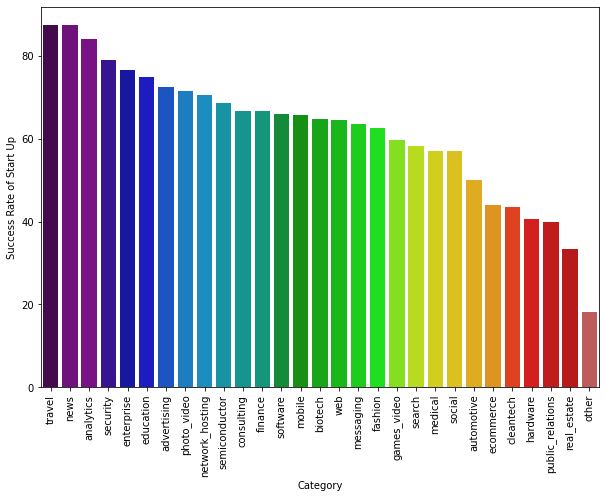

In [274]:
# Plotting the success rate
fig, ax = plt.subplots(figsize=(10,7))
plot = sns.barplot(x="category_code", y="success_rate", data=most_succes_rate,
                palette="nipy_spectral", ax=ax)
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plot = ax.set(xlabel="Category", ylabel="Success Rate of Start Up")

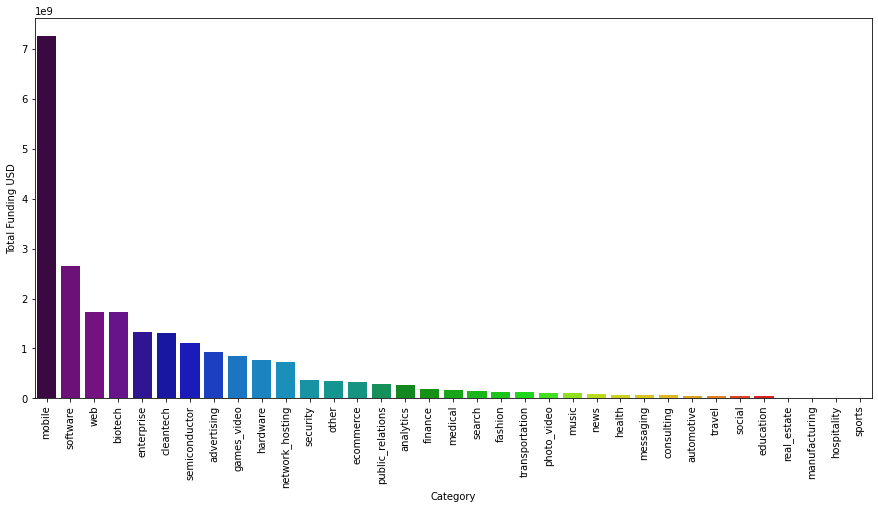

In [275]:
# Calculating the funding received for each industry
funding_sorted_category = pd.pivot_table(df,
              index=['category_code'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_category.columns = ['category_code', 'funding_total_usd']
funding_sorted_category = funding_sorted_category.sort_values(['funding_total_usd'], ascending = False)

fig, ax = plt.subplots(figsize=(15,7))
plot = sns.barplot(x="category_code", y="funding_total_usd", data=funding_sorted_category,
                palette="nipy_spectral", ax=ax)
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plot = ax.set(xlabel="Category", ylabel="Total Funding USD")

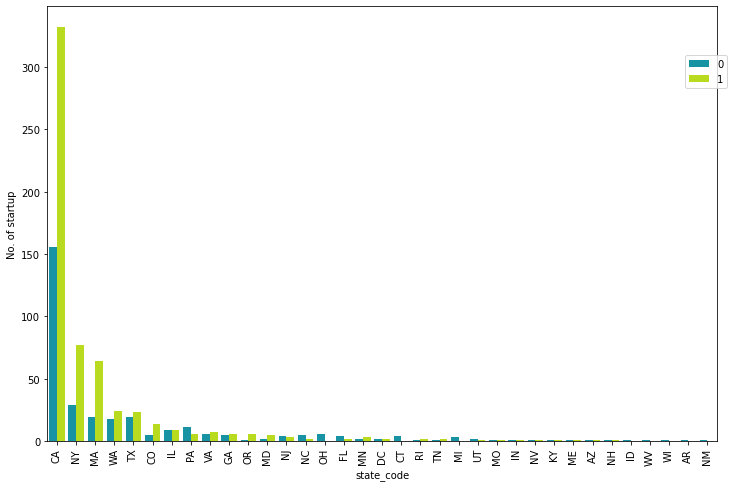

In [276]:
# Plotting for number of startup in each industry
fig, ax = plt.subplots(figsize=(12,8))

plot = sns.countplot(x="state_code", hue="status", data=df, palette="nipy_spectral",
              order=df.state_code.value_counts().index)

plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plot = ax.set(xlabel="state_code", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

<AxesSubplot:xlabel='funding_rounds', ylabel='count'>

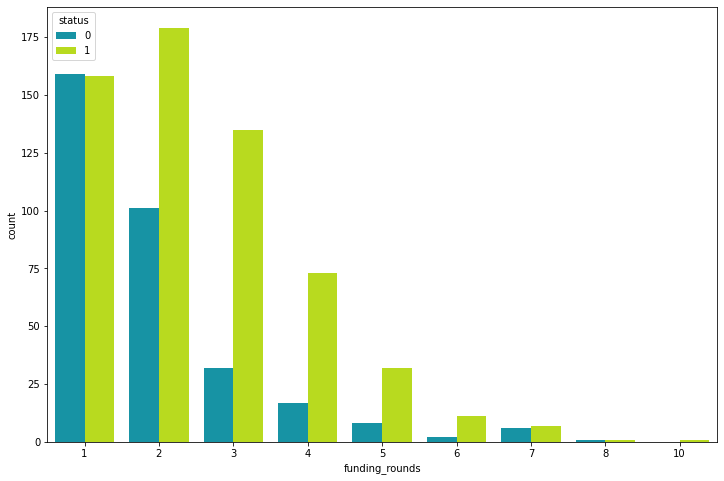

In [277]:
# Plotting amount of funding received in each round for a successful and unsuccessful startups
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="funding_rounds", hue="status", data=df, palette="nipy_spectral", order=df.funding_rounds.value_counts().index)

In [278]:
# check for duplicate
duplicate = df[df.duplicated()] 
  
print("Duplicate Rows :")

Duplicate Rows :


In [279]:
# checked negative  values
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for a in range(len(age)):
    print("Negative value in '{}' column  : {} ".format(age[a],(df[age[a]]<0).any()))


Negative value in 'age_first_funding_year' column  : True 
Negative value in 'age_last_funding_year' column  : True 
Negative value in 'age_first_milestone_year' column  : True 
Negative value in 'age_last_milestone_year' column  : True 


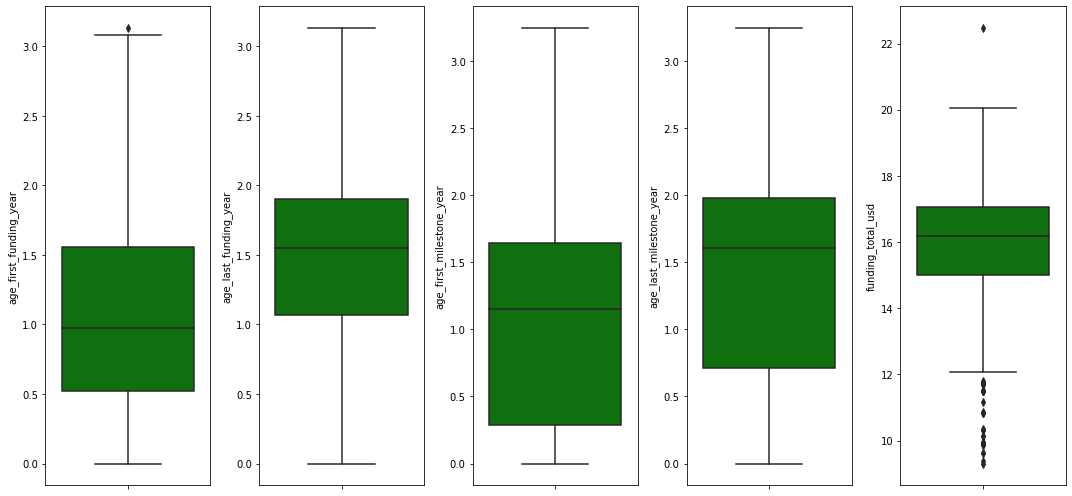

In [280]:
# dropped negative values
df=df.drop(df[df.age_first_funding_year<0].index)
df=df.drop(df[df.age_last_funding_year<0].index)
df=df.drop(df[df.age_first_milestone_year<0].index)
df=df.drop(df[df.age_last_milestone_year<0].index)

# logging the numerical values
df["age_first_funding_year"] = np.log1p(df["age_first_funding_year"])
df["age_last_funding_year"] = np.log1p(df["age_last_funding_year"])
df["age_first_milestone_year"] = np.log1p(df["age_first_milestone_year"])
df["age_last_milestone_year"] = np.log1p(df["age_last_milestone_year"])
df["funding_total_usd"] = np.log1p(df["funding_total_usd"])

# checking for outliers
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()


In [281]:
# combined round columns into one
df['has_RoundABCD'] = np.where((df['has_roundA'] == 1) | (df['has_roundB'] == 1) | (df['has_roundC'] == 1) | (df['has_roundD'] == 1), 1, 0)

# combined vc and angel columns into one
df['has_Investor'] = np.where((df['has_VC'] == 1) | (df['has_angel'] == 1), 1, 0)

# combined new columns into one
df['has_Seed'] = np.where((df['has_RoundABCD'] == 0) & (df['has_Investor'] == 1), 1, 0)

# created to combine startups with no funding rounds, vc and angel
df['invalid_startup'] = np.where((df['has_RoundABCD'] == 0) & (df['has_VC'] == 0) & (df['has_angel'] == 0), 1, 0)

# column to get age of startup
df.founded_at=pd.to_datetime(df.founded_at)
df.closed_at=pd.to_datetime(df.closed_at)
df['age_closed_startup'] = df.apply(lambda row: (row.closed_at - row.founded_at) , axis=1)

df['age_startup_year'] = df['age_closed_startup'].dt.days /365


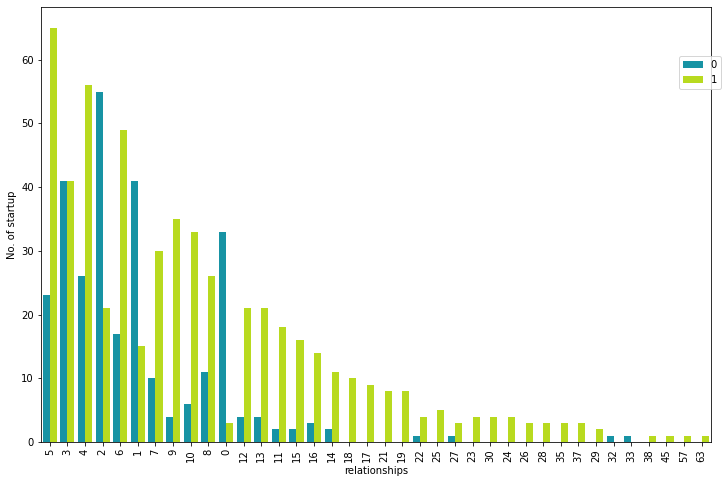

In [282]:
# plotted a distribution of relationships

fig, ax = plt.subplots(figsize=(12,8))

plot = sns.countplot(x="relationships", hue="status", data=df, palette="nipy_spectral",
              order=df.relationships.value_counts().index)

plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plot = ax.set(xlabel="relationships", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

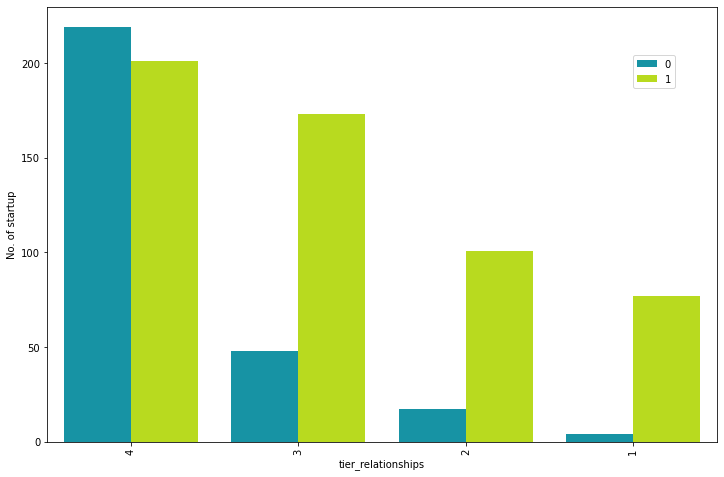

In [283]:
# created a list of our conditions
conditions = [
    (df['relationships'] <= 5),
    (df['relationships'] > 5) & (df['relationships'] <= 10),
    (df['relationships'] > 10) & (df['relationships'] <= 16),
    (df['relationships'] > 16)
    ]

# created a list of the values we want to assign for each condition
values = ['4', '3', '2', '1']

# created a new column and used np.select to assign values to it using our lists as arguments
df['tier_relationships'] = np.select(conditions, values)

fig, ax = plt.subplots(figsize=(12,8))

plot = sns.countplot(x="tier_relationships", hue="status", data=df, palette="nipy_spectral",
              order=df.tier_relationships.value_counts().index)

plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plot = ax.set(xlabel="tier_relationships", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [284]:
df['tier_relationships'] = df.tier_relationships.astype(int)

# dropped columns
df = df.drop(['relationships','Unnamed: 0','Unnamed: 6', 'name', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'id', 'object_id', 'labels', 'latitude', 'longitude', 'zip_code', 'city', 'state_code','category_code', 'age_closed_startup'], axis=1)

In [285]:
# extracted feature columns and target column
features = df.loc[:, df.columns != 'status']
target = df.loc[:, 'status']

# split the dataset into test and train  train:test=80:20
X_train, X_test, y_train, y_test  = train_test_split(features, target, train_size=0.8, random_state=42)

# print confusion matrix and calculate accuracy rate
def print_performance(pred,actual):
    actual_array = np.array(actual)
    unique_label = np.unique([actual, pred])
    cf = pd.DataFrame(
        confusion_matrix(actual_array, pred, labels=unique_label), 
        index=['Actual:{:}'.format(x) for x in unique_label], 
        columns=['Pred:{:}'.format(x) for x in unique_label]
    )
    sns.heatmap(cf, annot = True, cmap = 'YlGnBu', fmt = '.8g')
    plt.show()
    print(cf)
    print('Percent Acquired correctly predicted: ', cf['Pred:1'][1]/(cf['Pred:0'][1] +cf['Pred:1'][1])*100)
    print('Percent Not Acquired correctly predicted: ', cf['Pred:0'][0]/(cf['Pred:0'][0] +cf['Pred:1'][0])*100)

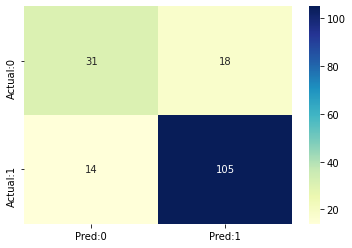

          Pred:0  Pred:1
Actual:0      31      18
Actual:1      14     105
Percent Acquired correctly predicted:  88.23529411764706
Percent Not Acquired correctly predicted:  63.26530612244898
Accuracy of the test set:  0.8095238095238095


In [286]:
# Logistic Regression
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)
y_pred = logistic_clf.predict(X_test)
print_performance(y_pred, y_test)
print("Accuracy of the test set: ", accuracy_score(y_test, y_pred))

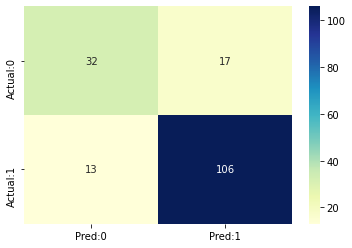

          Pred:0  Pred:1
Actual:0      32      17
Actual:1      13     106
Percent Acquired correctly predicted:  89.07563025210085
Percent Not Acquired correctly predicted:  65.3061224489796
Accuracy of the test set:  0.8214285714285714


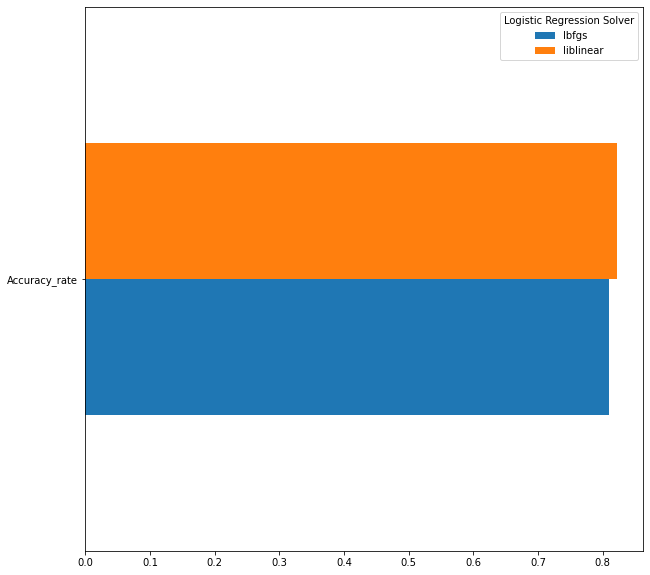

In [287]:
# Logistic regression using liblinear solver
logistic_clf_liblinear = LogisticRegression(solver='liblinear', penalty='l1')
logistic_clf_liblinear.fit(X_train, y_train)
y_pred_log_2 = logistic_clf_liblinear.predict(X_test)
print_performance(y_pred_log_2, y_test)
print("Accuracy of the test set: ", accuracy_score(y_test, y_pred_log_2))

logistic = {
    'lbfgs': {
        'Accuracy_rate': accuracy_score(y_test, y_pred)
    },
    'liblinear': {
        'Accuracy_rate': accuracy_score(y_test, y_pred_log_2)
    }
}

logistic = pd.DataFrame(logistic)
logistic.plot(kind="barh",figsize=(10, 10)).legend(title="Logistic Regression Solver")

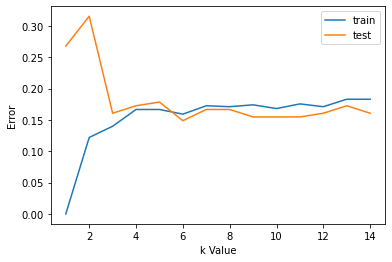

In [288]:
# KNN implementation
from sklearn.neighbors import KNeighborsClassifier

# calculating error for each value of K
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred_knn_1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred_knn_1))
    y_pred_knn_2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred_knn_2))

# plotting error vs K value
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

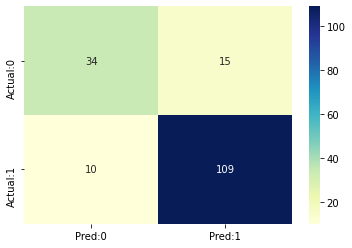

          Pred:0  Pred:1
Actual:0      34      15
Actual:1      10     109
Percent Acquired correctly predicted:  91.59663865546219
Percent Not Acquired correctly predicted:  69.38775510204081
Accuracy of the test set:  0.8511904761904762


In [294]:
# implemenetation of KNN algorithm
knn_clf = KNeighborsClassifier(n_neighbors=6)
knn_clf.fit(X_train, y_train)
y_test_pred_knn = knn_clf.predict(X_test)
print_performance(y_test_pred_knn, y_test)
print("Accuracy of the test set: ", accuracy_score(y_test, y_test_pred_knn))

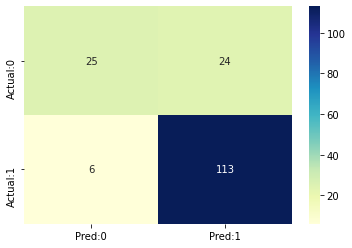

          Pred:0  Pred:1
Actual:0      25      24
Actual:1       6     113
Percent Acquired correctly predicted:  94.9579831932773
Percent Not Acquired correctly predicted:  51.02040816326531
Accuracy of the test set:  0.8214285714285714


In [295]:
# Implementation of Random Forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=22, max_depth=7, criterion="gini")
forest.fit(X_train, y_train)
y_test_pred_forest = forest.predict(X_test)
print_performance(y_test_pred_forest, y_test)
print("Accuracy of the test set: ", accuracy_score(y_test, y_test_pred_forest))  

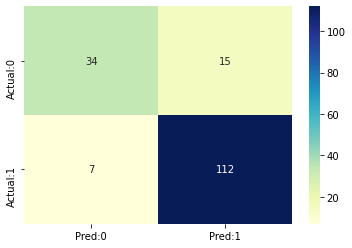

          Pred:0  Pred:1
Actual:0      34      15
Actual:1       7     112
Percent Acquired correctly predicted:  94.11764705882352
Percent Not Acquired correctly predicted:  69.38775510204081
Accuracy of the test set:  0.8690476190476191


In [296]:
# Implementaion of Adaptive Boosting
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train, y_train)
y_pred_ada = ab.predict(X_test)
print_performance(y_pred_ada, y_test)
print("Accuracy of the test set: ", accuracy_score(y_test, y_pred_ada))

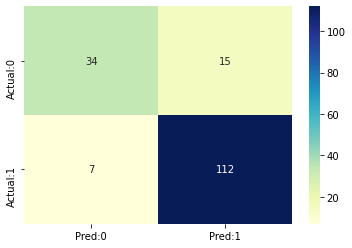

          Pred:0  Pred:1
Actual:0      34      15
Actual:1       7     112
Percent Acquired correctly predicted:  94.11764705882352
Percent Not Acquired correctly predicted:  69.38775510204081
Accuracy of the test set:  0.8690476190476191


In [297]:
# Implementation of Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.02, max_depth=4, random_state=100, n_estimators=1000)
gbc.fit(X_train,y_train)
y_pred_gbc = ab.predict(X_test)
print_performance(y_pred_gbc, y_test)
print("Accuracy of the test set: ", accuracy_score(y_test, y_pred_gbc))

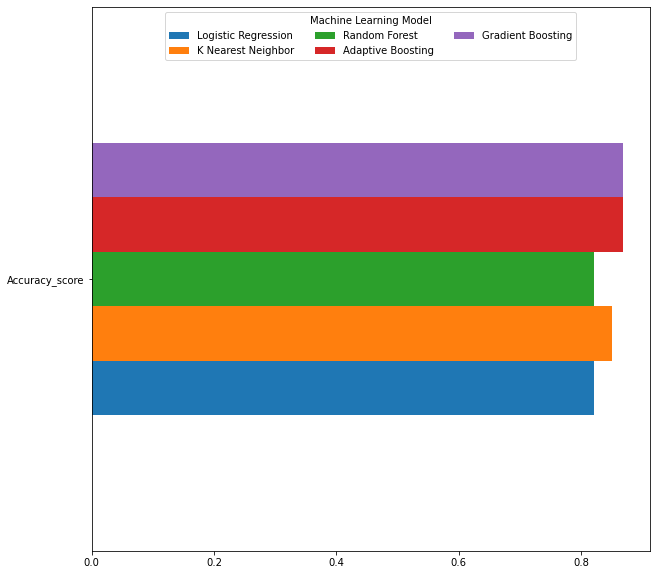

In [298]:
# Gathering accuracy score for each model
scores = {
    'Logistic Regression': {
        'Accuracy_score': accuracy_score(y_test, y_pred_log_2)
        },
    'K Nearest Neighbor': {
        'Accuracy_score': accuracy_score(y_test, y_test_pred_knn)
    },
    'Random Forest': {
        'Accuracy_score': accuracy_score(y_test, y_test_pred_forest)
    },
    'Adaptive Boosting': {
        'Accuracy_score': accuracy_score(y_test, y_pred_ada)
    },
    'Gradient Boosting':{
        'Accuracy_score': accuracy_score(y_test, y_pred_gbc)
    }
}

# Plotting comparsion of each model
scores = pd.DataFrame(scores)
scores.plot(kind="barh",figsize=(10, 10)).legend(loc='upper center', ncol=3, title="Machine Learning Model")